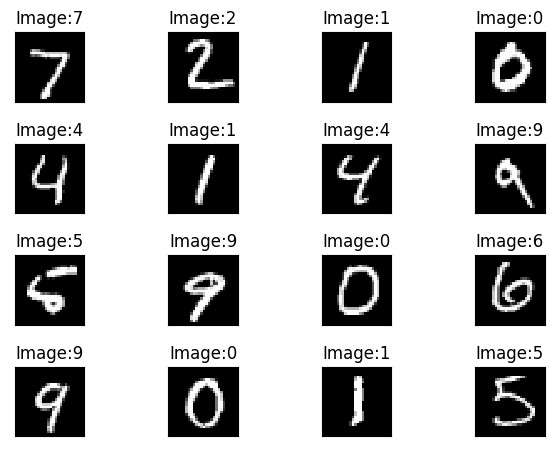

In [8]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

batch_size = 64
lr = 0.01
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 可视化测试集中的一些样本
examples = enumerate(test_loader)
batch_idx, (example_data, example_label) = next(examples)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Image:{}".format(example_label[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

[1,   300] loss: 0.437
[1,   600] loss: 0.163
[1,   900] loss: 0.130
accuracy on test set: 96 % 


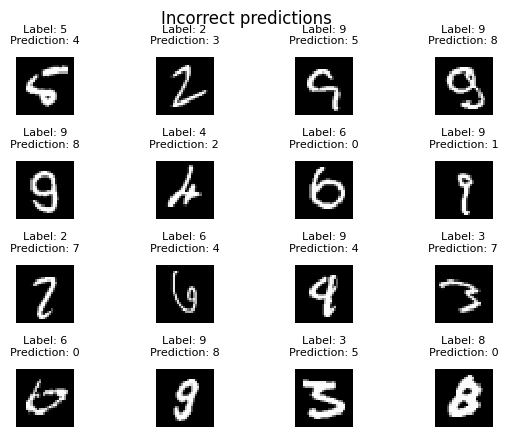

[2,   300] loss: 0.090
[2,   600] loss: 0.083
[2,   900] loss: 0.079
accuracy on test set: 96 % 


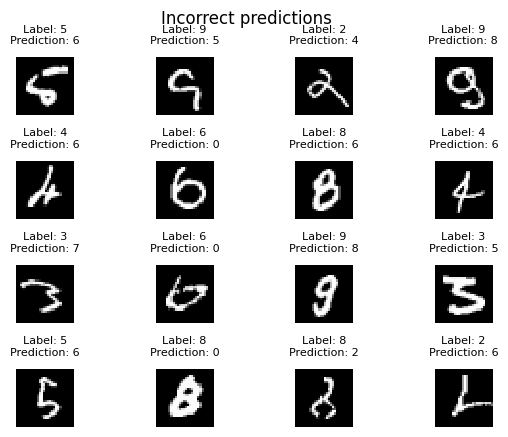

[3,   300] loss: 0.056
[3,   600] loss: 0.056
[3,   900] loss: 0.051
accuracy on test set: 97 % 


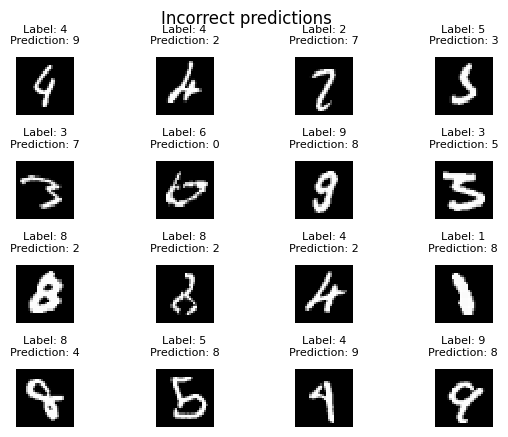

[4,   300] loss: 0.037
[4,   600] loss: 0.039
[4,   900] loss: 0.038
accuracy on test set: 97 % 


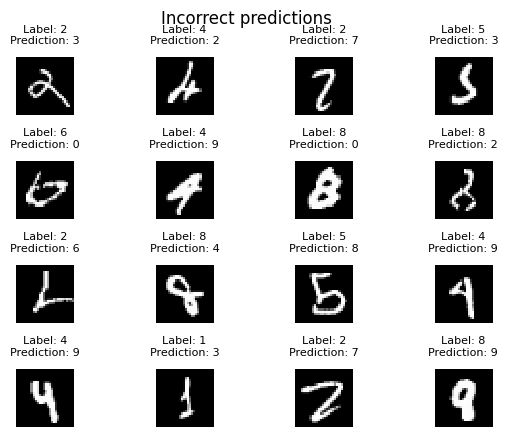

[5,   300] loss: 0.024
[5,   600] loss: 0.028
[5,   900] loss: 0.028
accuracy on test set: 98 % 


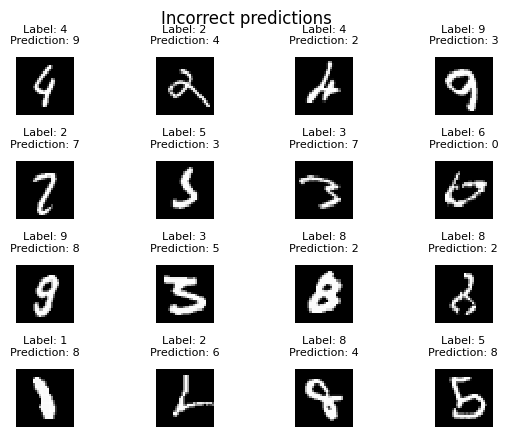

[6,   300] loss: 0.017
[6,   600] loss: 0.018
[6,   900] loss: 0.021
accuracy on test set: 98 % 


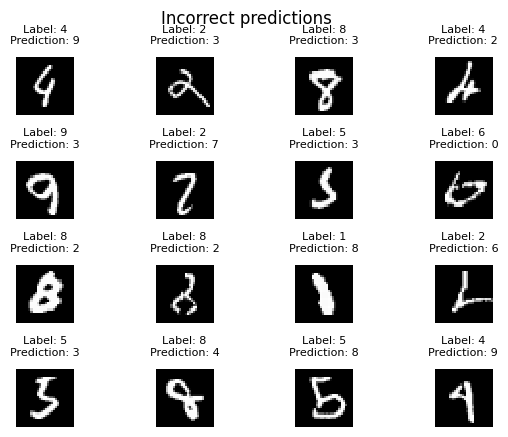

[7,   300] loss: 0.012
[7,   600] loss: 0.014
[7,   900] loss: 0.016
accuracy on test set: 98 % 


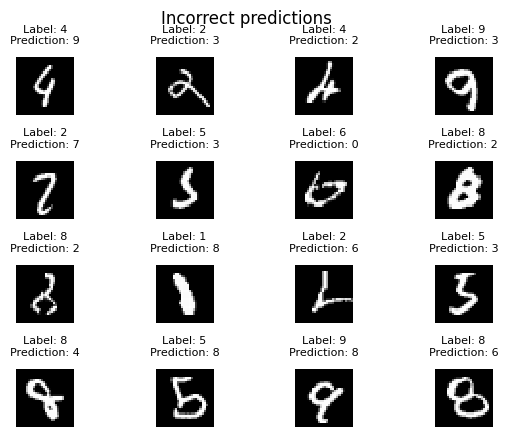

[8,   300] loss: 0.010
[8,   600] loss: 0.010
[8,   900] loss: 0.008
accuracy on test set: 98 % 


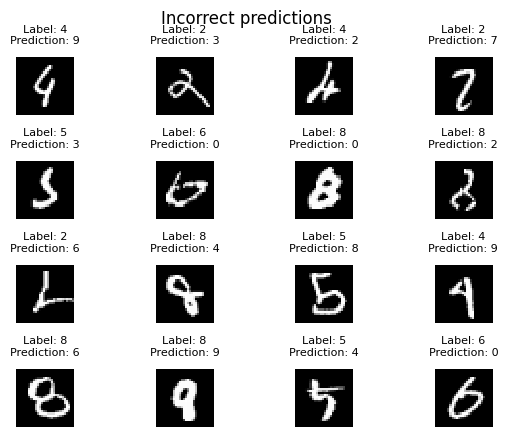

[9,   300] loss: 0.007
[9,   600] loss: 0.006
[9,   900] loss: 0.006
accuracy on test set: 98 % 


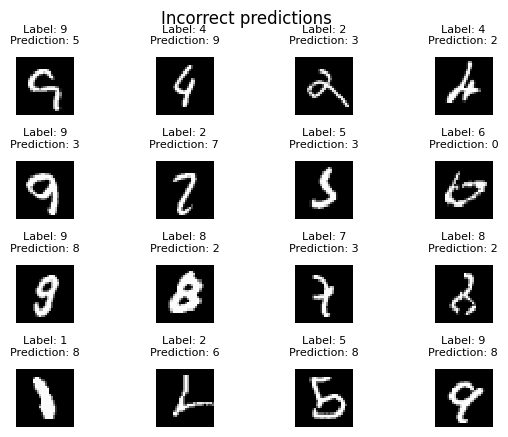

[10,   300] loss: 0.005
[10,   600] loss: 0.004
[10,   900] loss: 0.005
accuracy on test set: 98 % 


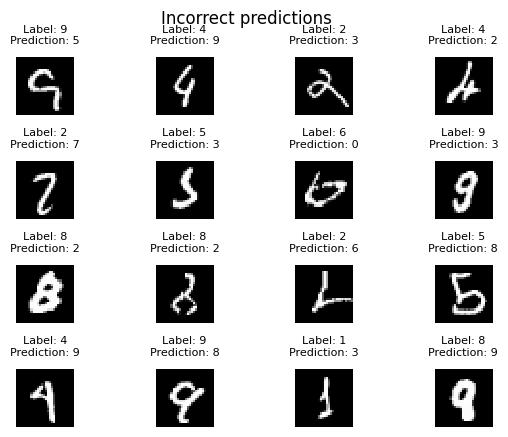

In [9]:
# 定义神经网络模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784, 512)
        self.l2 = torch.nn.Linear(512, 256)
        self.l3 = torch.nn.Linear(256, 128)
        self.l4 = torch.nn.Linear(128, 64)
        self.l5 = torch.nn.Linear(64, 10)
 
    def forward(self, x):
        x = x.view(-1, 784) 
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)
 
model = Net()

# 定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.Adagrad(model.parameters(), lr=lr)

# 定义训练函数
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        # 获取训练数据
        inputs, target = data
        # 梯度清零
        optimizer.zero_grad()
        # 前向传播
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, target)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0

# 定义测试函数
# def test():
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for data in test_loader:
#             # 获取测试数据
#             images, labels = data
#             # 前向传播
#             outputs = model(images)
#             # 预测类别
#             _, predicted = torch.max(outputs.data, dim=1) 
#             total += labels.size(0)
#             # 统计预测正确的样本数
#             correct += (predicted == labels).sum().item()
#     # 输出测试准确率
#     print('accuracy on test set: %d %% ' % (100*correct/total)) 
def test():
    correct = 0
    total = 0
    incorrect_pred = []  # 存储预测错误的图片
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1) 
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 判断预测是否正确，如果不正确则存储预测错误的图片
            for i in range(len(predicted)):
                if predicted[i] != labels[i]:
                    incorrect_pred.append((images[i], labels[i], predicted[i]))

        print('accuracy on test set: %d %% ' % (100*correct/total))
        
        # 可视化测试集中的一些样本
        num_of_images = min(len(incorrect_pred), 16)  # 最多显示16张预测错误的图片
        if num_of_images > 0:
            fig, axes = plt.subplots(nrows=4, ncols=4)
            fig.subplots_adjust(hspace=0.8, wspace=0.8)
            fig.suptitle('Incorrect predictions')
            for i in range(num_of_images):
                row = i // 4
                col = i % 4
                axes[row][col].imshow(incorrect_pred[i][0][0], cmap='gray', interpolation='none')
#                 axes[row][col].set_title('Label:{}\nPrediction:{}'.format(
#                     incorrect_pred[i][1], incorrect_pred[i][2]), pad = 3)
                axes[row][col].set_title('Label: {}\nPrediction: {}'.format(
                    incorrect_pred[i][1], incorrect_pred[i][2]), fontsize=8, pad=10)
                axes[row][col].axis('off')
            plt.show()
# 主程序入口
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

1


938